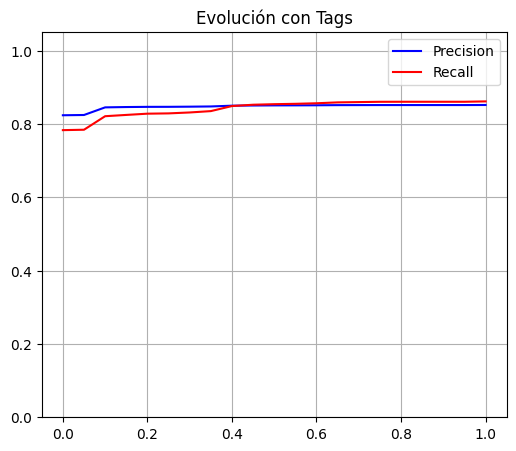

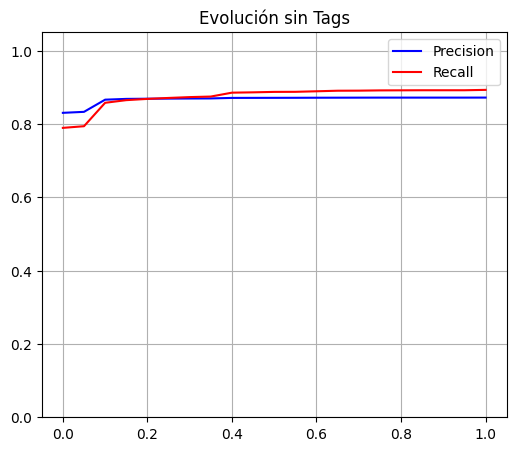

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Configuración
BASE_DIR = "errores"
MARGINS = [i/100 for i in range(0, 105, 5)]  # 0.00 a 1.00

# Función para extraer métricas
def extract_metrics(tag_status):
    precisions = []
    recalls = []
    
    for margin in MARGINS:
        margin_str = f"{margin:.2f}".replace(".", "_")
        metrics_file = Path(BASE_DIR) / tag_status / f"margin_{margin_str}" / "metrics_prompt8.txt"
        
        if metrics_file.exists():
            with open(metrics_file, 'r') as f:
                content = f.read()
                precision = float(content.split("Precision: ")[1].split("\n")[0])
                recall = float(content.split("Recall: ")[1].split("\n")[0])
                precisions.append(precision)
                recalls.append(recall)
    
    return np.array(MARGINS), np.array(precisions), np.array(recalls)

# Primera gráfica: con tags
margins, precisions, recalls = extract_metrics("with_tags")
plt.figure(figsize=(6, 5))
plt.plot(margins, precisions, 'b-', label='Precision')
plt.plot(margins, recalls, 'r-', label='Recall')
plt.title("Evolución con Tags")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)

plt.show()

# Segunda gráfica: sin tags
margins, precisions, recalls = extract_metrics("no_tags")
plt.figure(figsize=(6, 5))
plt.plot(margins, precisions, 'b-', label='Precision')
plt.plot(margins, recalls, 'r-', label='Recall')
plt.title("Evolución sin Tags")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)

plt.show()